In [12]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os


In [13]:
# Define the path to your dataset folders
base_dir = r'C:\Users\ASUS\OneDrive\Desktop\fyp2\datasets\apple_disease_classification'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation for the training set with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split 20% of the training data for validation
)

# No augmentation for the test set, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data with validation split
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='categorical',  # 4 classes: normal, scab, blotch, rot
    subset='training'  # Training subset
)

# Load the validation data
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1280 images belonging to 4 classes.
Found 319 images belonging to 4 classes.
Found 378 images belonging to 4 classes.


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# EarlyStopping callback to stop training when the validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=30,          # Stop after 30 epochs with no improvement
    restore_best_weights=True,  # Restore the model with the best weights
    verbose=1
)

# ModelCheckpoint callback to save the best model based on validation accuracy
model_checkpoint = ModelCheckpoint(
    'best_model.keras',    # save the model
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode='max',  # We want the maximum accuracy
    verbose=1
)


In [16]:
from tensorflow.keras import layers, models

# Create the model
model = models.Sequential([
    # Define input shape explicitly using Input layer
    layers.Input(shape=(150, 150, 3)),

    # First convolutional layer with BatchNormalization and Dropout
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Batch normalization for the first Conv layer
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout to prevent overfitting

    # Second convolutional layer with BatchNormalization and Dropout
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout to prevent overfitting

    # Third convolutional layer with BatchNormalization and Dropout
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),  # Dropout to prevent overfitting

    # Flatten the results to feed them into a Dense layer
    layers.Flatten(),

    # Fully connected layer with BatchNormalization and Dropout
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Dropout to prevent overfitting

    # Output layer
    layers.Dense(4, activation='softmax')  # 4 classes (Normal, Scab, Blotch, Rot)
])

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  # learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
# Train the model
history = model.fit(
    train_generator,  # Training data generator
    epochs=100,  # Number of epochs
    validation_data=val_generator,  # Validation data generator (change this)
    callbacks=[early_stopping, model_checkpoint]  # Callbacks for early stopping and saving the best model
)



Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4674 - loss: 1.9825
Epoch 1: val_accuracy improved from -inf to 0.25078, saving model to best_model.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.4690 - loss: 1.9742 - val_accuracy: 0.2508 - val_loss: 12.3731
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6253 - loss: 1.1335
Epoch 2: val_accuracy did not improve from 0.25078
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6251 - loss: 1.1339 - val_accuracy: 0.2508 - val_loss: 11.2437
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6472 - loss: 1.0645
Epoch 3: val_accuracy did not improve from 0.25078
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6470 - loss: 1.0658 - val_accuracy: 0.2508 - val_loss: 9.9373
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6286 - loss: 1.0749
Epoch 4: val_accuracy did not improve from 0.25078
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6287 - loss: 1.0743 - val

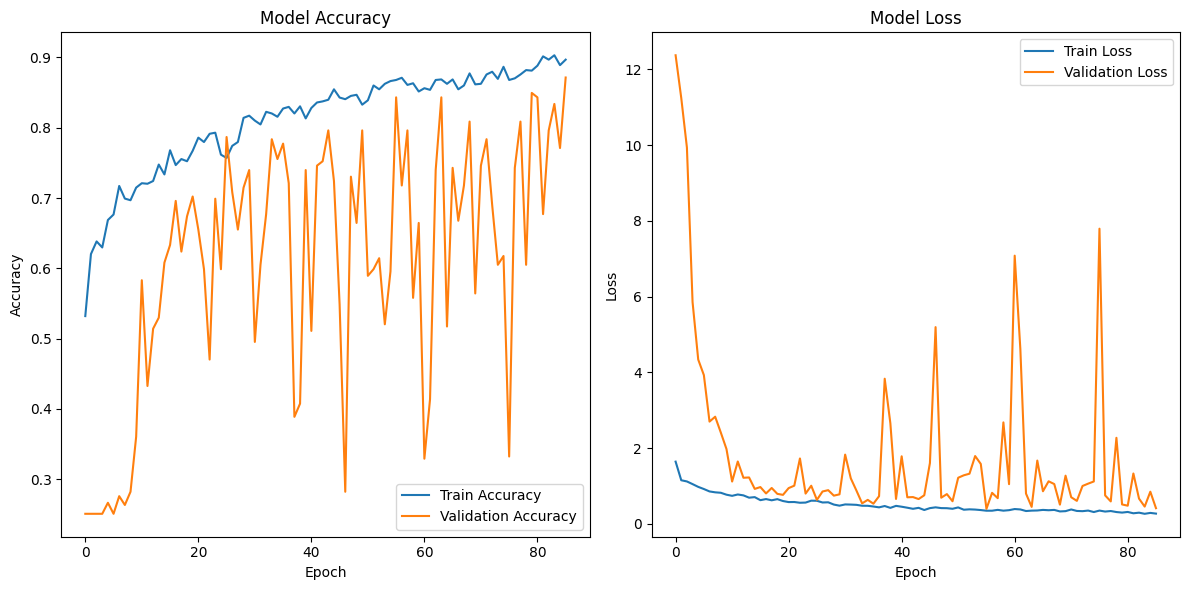

In [18]:
import matplotlib.pyplot as plt

# history' is the variable that stores the result from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show plots
plt.tight_layout()
plt.show()


In [19]:
# Assuming 'history' object is already available

# Training accuracy and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Training loss and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Calculate averages
avg_train_acc = sum(train_accuracy) / len(train_accuracy)
avg_val_acc = sum(val_accuracy) / len(val_accuracy)
avg_train_loss = sum(train_loss) / len(train_loss)
avg_val_loss = sum(val_loss) / len(val_loss)

# Find highest and lowest accuracies
max_train_acc = max(train_accuracy)
min_train_acc = min(train_accuracy)
max_val_acc = max(val_accuracy)
min_val_acc = min(val_accuracy)

# Print average, highest, and lowest accuracy and loss values
print(f"Average Training Accuracy: {avg_train_acc * 100:.2f}%")
print(f"Average Validation Accuracy: {avg_val_acc * 100:.2f}%")
print(f"Average Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")

print(f"Highest Training Accuracy: {max_train_acc * 100:.2f}%")
print(f"Lowest Training Accuracy: {min_train_acc * 100:.2f}%")
print(f"Highest Validation Accuracy: {max_val_acc * 100:.2f}%")
print(f"Lowest Validation Accuracy: {min_val_acc * 100:.2f}%")


Average Training Accuracy: 81.21%
Average Validation Accuracy: 61.22%
Average Training Loss: 0.5082
Average Validation Loss: 1.8271
Highest Training Accuracy: 90.31%
Lowest Training Accuracy: 53.20%
Highest Validation Accuracy: 87.15%
Lowest Validation Accuracy: 25.08%
